In [1]:
# Import our dependencies

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
%matplotlib inline

In [3]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf



In [5]:
# List of tickers
tickers = ['AMZN', 'MSFT', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
msft_stock = stock_data['MSFT']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"MSFT :{len(msft_stock)},\n AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
MSFT :522,
 AMZN:522,
 VALE:522,
 AAPL:501 


In [6]:
Apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,AAPL
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,AAPL


In [50]:
Apple_stock.iloc[:,2:3].values

array([[182.880005],
       [182.940002],
       [180.169998],
       [175.300003],
       [174.139999],
       [172.5     ],
       [175.179993],
       [177.179993],
       [176.619995],
       [173.779999],
       [172.539993],
       [171.080002],
       [169.679993],
       [166.330002],
       [162.300003],
       [162.759995],
       [164.389999],
       [163.839996],
       [170.350006],
       [175.      ],
       [174.839996],
       [175.880005],
       [176.240005],
       [174.100006],
       [173.949997],
       [175.350006],
       [176.649994],
       [175.479996],
       [173.080002],
       [169.580002],
       [172.949997],
       [173.339996],
       [171.910004],
       [170.539993],
       [166.690002],
       [166.149994],
       [162.850006],
       [165.119995],
       [165.419998],
       [166.600006],
       [167.360001],
       [168.910004],
       [165.550003],
       [165.020004],
       [162.880005],
       [163.410004],
       [160.389999],
       [159.2

In [7]:
#Using the Open Stock Price to be our traing dataset
training_set=Apple_stock.iloc[:,1:2].values

training_set

array([[177.830002],
       [182.630005],
       [179.610001],
       [172.699997],
       [172.889999],
       [169.080002],
       [172.320007],
       [176.119995],
       [175.779999],
       [171.339996],
       [171.509995],
       [170.      ],
       [166.979996],
       [164.419998],
       [160.020004],
       [158.979996],
       [163.5     ],
       [162.449997],
       [165.710007],
       [170.160004],
       [174.009995],
       [174.75    ],
       [174.479996],
       [171.679993],
       [172.860001],
       [171.729996],
       [176.050003],
       [174.139999],
       [172.330002],
       [167.369995],
       [170.970001],
       [171.850006],
       [171.029999],
       [169.820007],
       [164.979996],
       [165.539993],
       [152.580002],
       [163.839996],
       [163.059998],
       [164.699997],
       [164.389999],
       [168.470001],
       [164.490005],
       [163.360001],
       [158.820007],
       [161.479996],
       [160.199997],
       [158.9

In [8]:
#Scalling our Dataset/Normailzing the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.71962225],
       [0.7862797 ],
       [0.74434103],
       [0.64838208],
       [0.65102063],
       [0.59811136],
       [0.64310518],
       [0.69587546],
       [0.69115395],
       [0.6294958 ],
       [0.63185657],
       [0.61088733],
       [0.56894866],
       [0.53339807],
       [0.47229553],
       [0.45785298],
       [0.52062209],
       [0.50604074],
       [0.55131237],
       [0.6131093 ],
       [0.66657397],
       [0.67685039],
       [0.67310086],
       [0.63421733],
       [0.65060405],
       [0.63491172],
       [0.69490348],
       [0.66837933],
       [0.64324398],
       [0.57436456],
       [0.6243577 ],
       [0.63657829],
       [0.62519089],
       [0.60838778],
       [0.54117474],
       [0.54895139],
       [0.36897652],
       [0.5253436 ],
       [0.5145118 ],
       [0.5372864 ],
       [0.53298147],
       [0.5896403 ],
       [0.53437025],
       [0.51867793],
       [0.45563122],
       [0.49257038],
       [0.47479508],
       [0.457

In [9]:
#Setting up our features and target variables

X_train = []
y_train = []


for i in range(60,501):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

    

X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
Apple_stock.shape

(501, 8)

In [11]:
print(X_train.shape)
print(y_train.shape)

(441, 60)
(441,)


In [12]:
X_train

array([[0.71962225, 0.7862797 , 0.74434103, ..., 0.66476881, 0.64102201,
        0.70379112],
       [0.7862797 , 0.74434103, 0.64838208, ..., 0.64102201, 0.70379112,
        0.72962088],
       [0.74434103, 0.64838208, 0.65102063, ..., 0.70379112, 0.72962088,
        0.71976104],
       ...,
       [0.62782944, 0.64227179, 0.62602406, ..., 0.97333707, 0.96056088,
        0.93875847],
       [0.64227179, 0.62602406, 0.66351881, ..., 0.96056088, 0.93875847,
        0.92320513],
       [0.62602406, 0.66351881, 0.66365782, ..., 0.93875847, 0.92320513,
        0.94611853]])

In [13]:
y_train

array([0.72962088, 0.71976104, 0.66685177, 0.67435084, 0.71503953,
       0.64366057, 0.62699626, 0.63560611, 0.59297325, 0.58339121,
       0.57464235, 0.61949718, 0.52645459, 0.54173033, 0.59366743,
       0.5957506 , 0.56172759, 0.48757106, 0.50326339, 0.41522012,
       0.46160251, 0.49756968, 0.42632973, 0.44632678, 0.46743501,
       0.52548261, 0.4166087 , 0.40161075, 0.40980421, 0.3817525 ,
       0.23274547, 0.25801963, 0.27135121, 0.31731702, 0.2894043 ,
       0.19261217, 0.18164135, 0.16358826, 0.20552695, 0.17247592,
       0.15803356, 0.26912924, 0.32023336, 0.33175936, 0.30301346,
       0.29009848, 0.29190385, 0.2546869 , 0.31342868, 0.29259824,
       0.19816687, 0.09526445, 0.0988752 , 0.1149839 , 0.08429385,
       0.05638113, 0.10290232, 0.12192738, 0.1501181 , 0.19288976,
       0.23177329, 0.22385783, 0.15900576, 0.1560894 , 0.13928608,
       0.16331067, 0.21302602, 0.23996654, 0.26732388, 0.27301757,
       0.27426736, 0.23580062, 0.25093736, 0.33009299, 0.34342

In [14]:
#Reshaping the dataset
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(441, 60, 1)

In [15]:
regressor = Sequential()
regressor

In [16]:
# Adding Layers into the model 

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100

14/14 [==============================] - 14s 82ms/step - loss: 0.1030
Epoch 2/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0387
Epoch 3/100
14/14 [==============================] - 1s 74ms/step - loss: 0.0250
Epoch 4/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0191
Epoch 5/100
14/14 [==============================] - 1s 75ms/step - loss: 0.0199
Epoch 6/100
14/14 [==============================] - 1s 73ms/step - loss: 0.0170
Epoch 7/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0145
Epoch 8/100
14/14 [==============================] - 1s 70ms/step - loss: 0.0144
Epoch 9/100
14/14 [==============================] - 1s 69ms/step - loss: 0.0160
Epoch 10/100
14/14 [==============================] - 1s 70ms/step - loss: 0.0154
Epoch 11/100
14/14 [==============================] - 1s 73ms/step - loss: 0.0163
Epoch 12/100
14/14 [==============================] - 1s 69ms/step - loss: 0.0123
Epoch 13/100
14/14 [==

14/14 [==============================] - 1s 79ms/step - loss: 0.0049
Epoch 97/100
14/14 [==============================] - 1s 68ms/step - loss: 0.0042
Epoch 98/100
14/14 [==============================] - 1s 76ms/step - loss: 0.0048
Epoch 99/100
14/14 [==============================] - 1s 65ms/step - loss: 0.0048
Epoch 100/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0046


In [18]:
# Loading the Stock Prices for Jan-2024
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  

AAPL_stock_Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,AAPL_Test
1,2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500,AAPL_Test
2,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600,AAPL_Test
3,2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,AAPL_Test
4,2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,AAPL_Test


In [19]:
#Extracting our 2024 Data for open price
actual_stock_price = AAPL_stock_Test.iloc[:,1:2].values
actual_stock_price
# actual_stock_price.shape

array([[187.149994],
       [184.220001],
       [182.149994],
       [181.990005],
       [182.089996],
       [183.919998],
       [184.350006],
       [186.539993],
       [186.059998],
       [182.160004],
       [181.270004],
       [186.089996],
       [189.330002],
       [192.300003],
       [195.020004],
       [195.419998],
       [195.220001],
       [194.270004],
       [192.009995],
       [190.940002],
       [187.039993]])

In [37]:
#Preping our Data
dataset_total=pd.concat((Apple_stock['Open'],AAPL_stock_Test['Open']),axis  =0)
inputs=dataset_total[len(dataset_total)-len(AAPL_stock_Test)-60:].values

inputs
inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)


X_test = []

for i in range(60,81):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test

array([[[0.66351881],
        [0.66365782],
        [0.7054575 ],
        ...,
        [0.92320513],
        [0.94611853],
        [0.94278559]],

       [[0.66365782],
        [0.7054575 ],
        [0.72337179],
        ...,
        [0.94611853],
        [0.94278559],
        [0.84904861]],

       [[0.7054575 ],
        [0.72337179],
        [0.72476036],
        ...,
        [0.94278559],
        [0.84904861],
        [0.80835991]],

       ...,

       [[0.60186089],
        [0.62477429],
        [0.68754341],
        ...,
        [0.96389382],
        [0.96111647],
        [0.9479239 ]],

       [[0.62477429],
        [0.68754341],
        [0.66976811],
        ...,
        [0.96111647],
        [0.9479239 ],
        [0.91653925]],

       [[0.68754341],
        [0.66976811],
        [0.6994862 ],
        ...,
        [0.9479239 ],
        [0.91653925],
        [0.9016803 ]]])

In [38]:
actual_stock_price[1]

array([184.220001])

In [39]:
X_test[2][-1]

array([0.80835991])

In [40]:
inputs.shape

(81, 1)

In [41]:
#Predicting the Values for Jan 2024
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 50ms/step


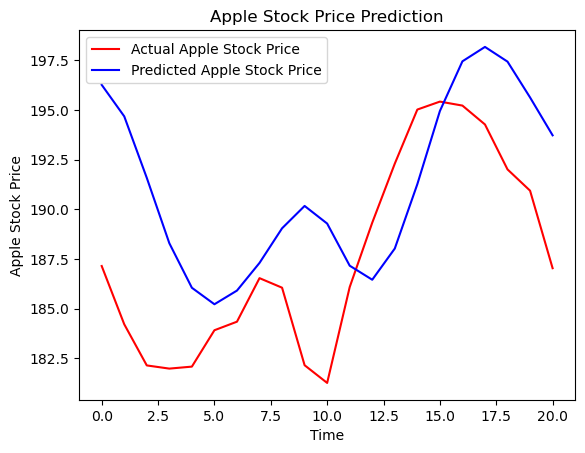

In [42]:
#Plotting the Data

plt.plot(actual_stock_price, color ='red', label ="Actual Apple Stock Price")
plt.plot(predicted_stock_price, color ='blue', label ="Predicted Apple Stock Price")
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()

In [43]:
predicted_stock_price, actual_stock_price

(array([[196.26366],
        [194.67825],
        [191.58366],
        [188.29608],
        [186.05623],
        [185.22696],
        [185.91513],
        [187.30661],
        [189.04726],
        [190.17177],
        [189.28592],
        [187.16656],
        [186.46014],
        [188.02986],
        [191.26694],
        [194.9442 ],
        [197.44658],
        [198.17065],
        [197.43095],
        [195.62952],
        [193.72438]], dtype=float32),
 array([[187.149994],
        [184.220001],
        [182.149994],
        [181.990005],
        [182.089996],
        [183.919998],
        [184.350006],
        [186.539993],
        [186.059998],
        [182.160004],
        [181.270004],
        [186.089996],
        [189.330002],
        [192.300003],
        [195.020004],
        [195.419998],
        [195.220001],
        [194.270004],
        [192.009995],
        [190.940002],
        [187.039993]]))

In [44]:
AAPL_stock_Test["Predicted Stock Price"] = predicted_stock_price
AAPL_stock_Test

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Predicted Stock Price
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,AAPL_Test,196.263657
1,2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500,AAPL_Test,194.678253
2,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600,AAPL_Test,191.583664
3,2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,AAPL_Test,188.296082
4,2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,AAPL_Test,186.056229
5,2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800,AAPL_Test,185.226959
6,2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,AAPL_Test,185.915131
7,2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,AAPL_Test,187.306610
8,2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,AAPL_Test,189.047256
9,2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000,AAPL_Test,190.171768


In [36]:
predicted_stock_price.shape

(20, 1)

In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
mse = mean_squared_error(AAPL_stock_Test["Open"], predicted_stock_price)
mse

30.343392695161963

In [48]:
rmse = np.sqrt(mse)
rmse

5.508483701996582